# Resume Parsing Project

## In this project, we will be working on parsing a resume in pdf format and apply Named Entity Recognition NER.

### Libraries used :
            1. EasyOCR
            2. Pdf2Image
            3. Spacy

In [ ]:
""" Downloading required libraries """
# !pip install pdf2image
# !pip install easyocr

## Necessary imports

In [4]:
import easyocr
import numpy as np
import spacy
from pdf2image import convert_from_path
import PIL
from PIL import ImageDraw

In [5]:
""" Creating a reader object for English language """
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [20]:
""" Converting our pdf into image """
images = convert_from_path('Sachin_Resume.pdf')

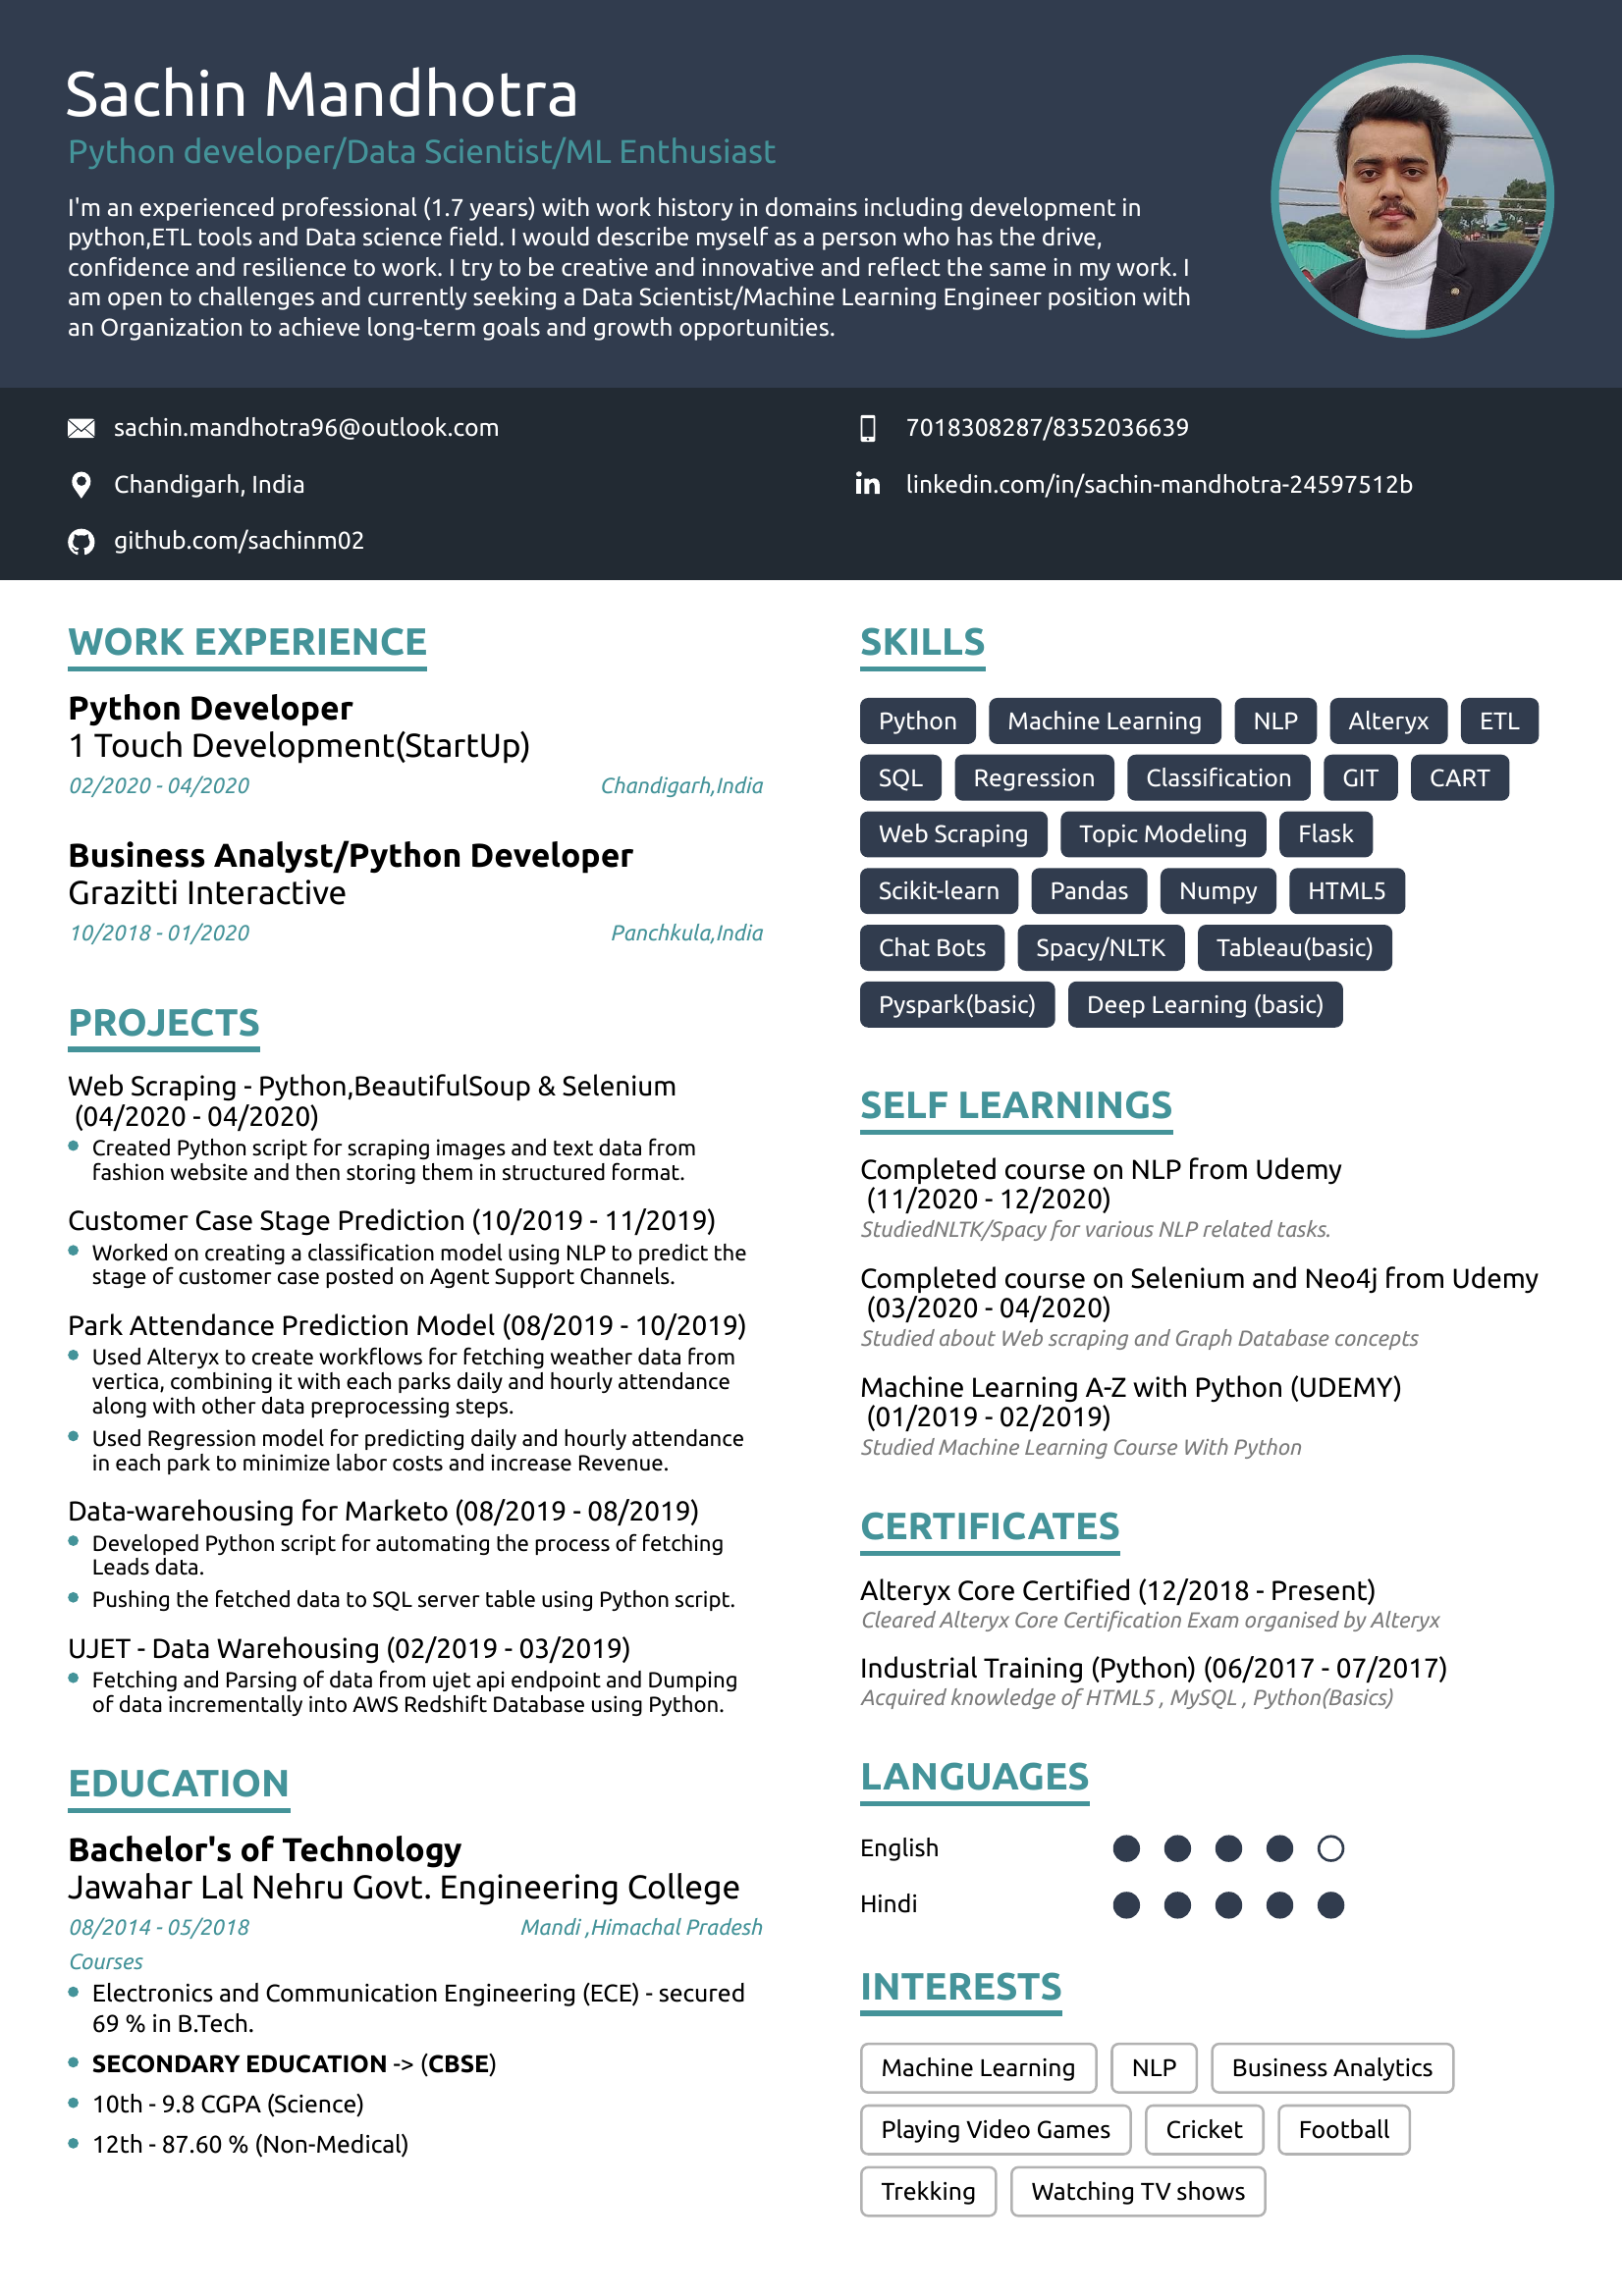

In [21]:
""" Using Ipython for displaying our pdf converted into image """
from IPython.display import display
display(images[0])

In [22]:
""" Converting the image into numpy array and using the reader object to read text from the array """
bounds = reader.readtext(np.array(images[0]))
bounds

[([[59, 60], [594, 60], [594, 129], [59, 129]],
  'Sachin Mandhotra',
  0.4479359984397888),
 ([[64, 132], [798, 132], [798, 182], [64, 182]],
  'Python developer/Data Scientist/ML Enthusiast',
  0.5243419408798218),
 ([[65, 192], [1167, 192], [1167, 232], [65, 232]],
  "I'm an experienced professional (1.7 years) with work history in domains including development in",
  0.058688823133707047),
 ([[65, 225], [519, 225], [519, 261], [65, 261]],
  'python,ETL tools and Data science field.',
  0.07031713426113129),
 ([[530, 226], [706, 226], [706, 256], [530, 256]],
  'would describe',
  0.7531951069831848),
 ([[786, 226], [1127, 226], [1127, 258], [786, 258]],
  'as a person who has the drive,',
  0.08375424146652222),
 ([[704.4789396203098, 231.4141973545267],
   [785.7593345042422, 225.82268394485664],
   [787.5210603796902, 253.5858026454733],
   [705.2406654957578, 260.17731605514336]],
  'myselF',
  0.7519305348396301),
 ([[465, 257], [1213, 257], [1213, 293], [465, 293]],
  'tryto b

## Creating a handy function to red mark the identified text in our image

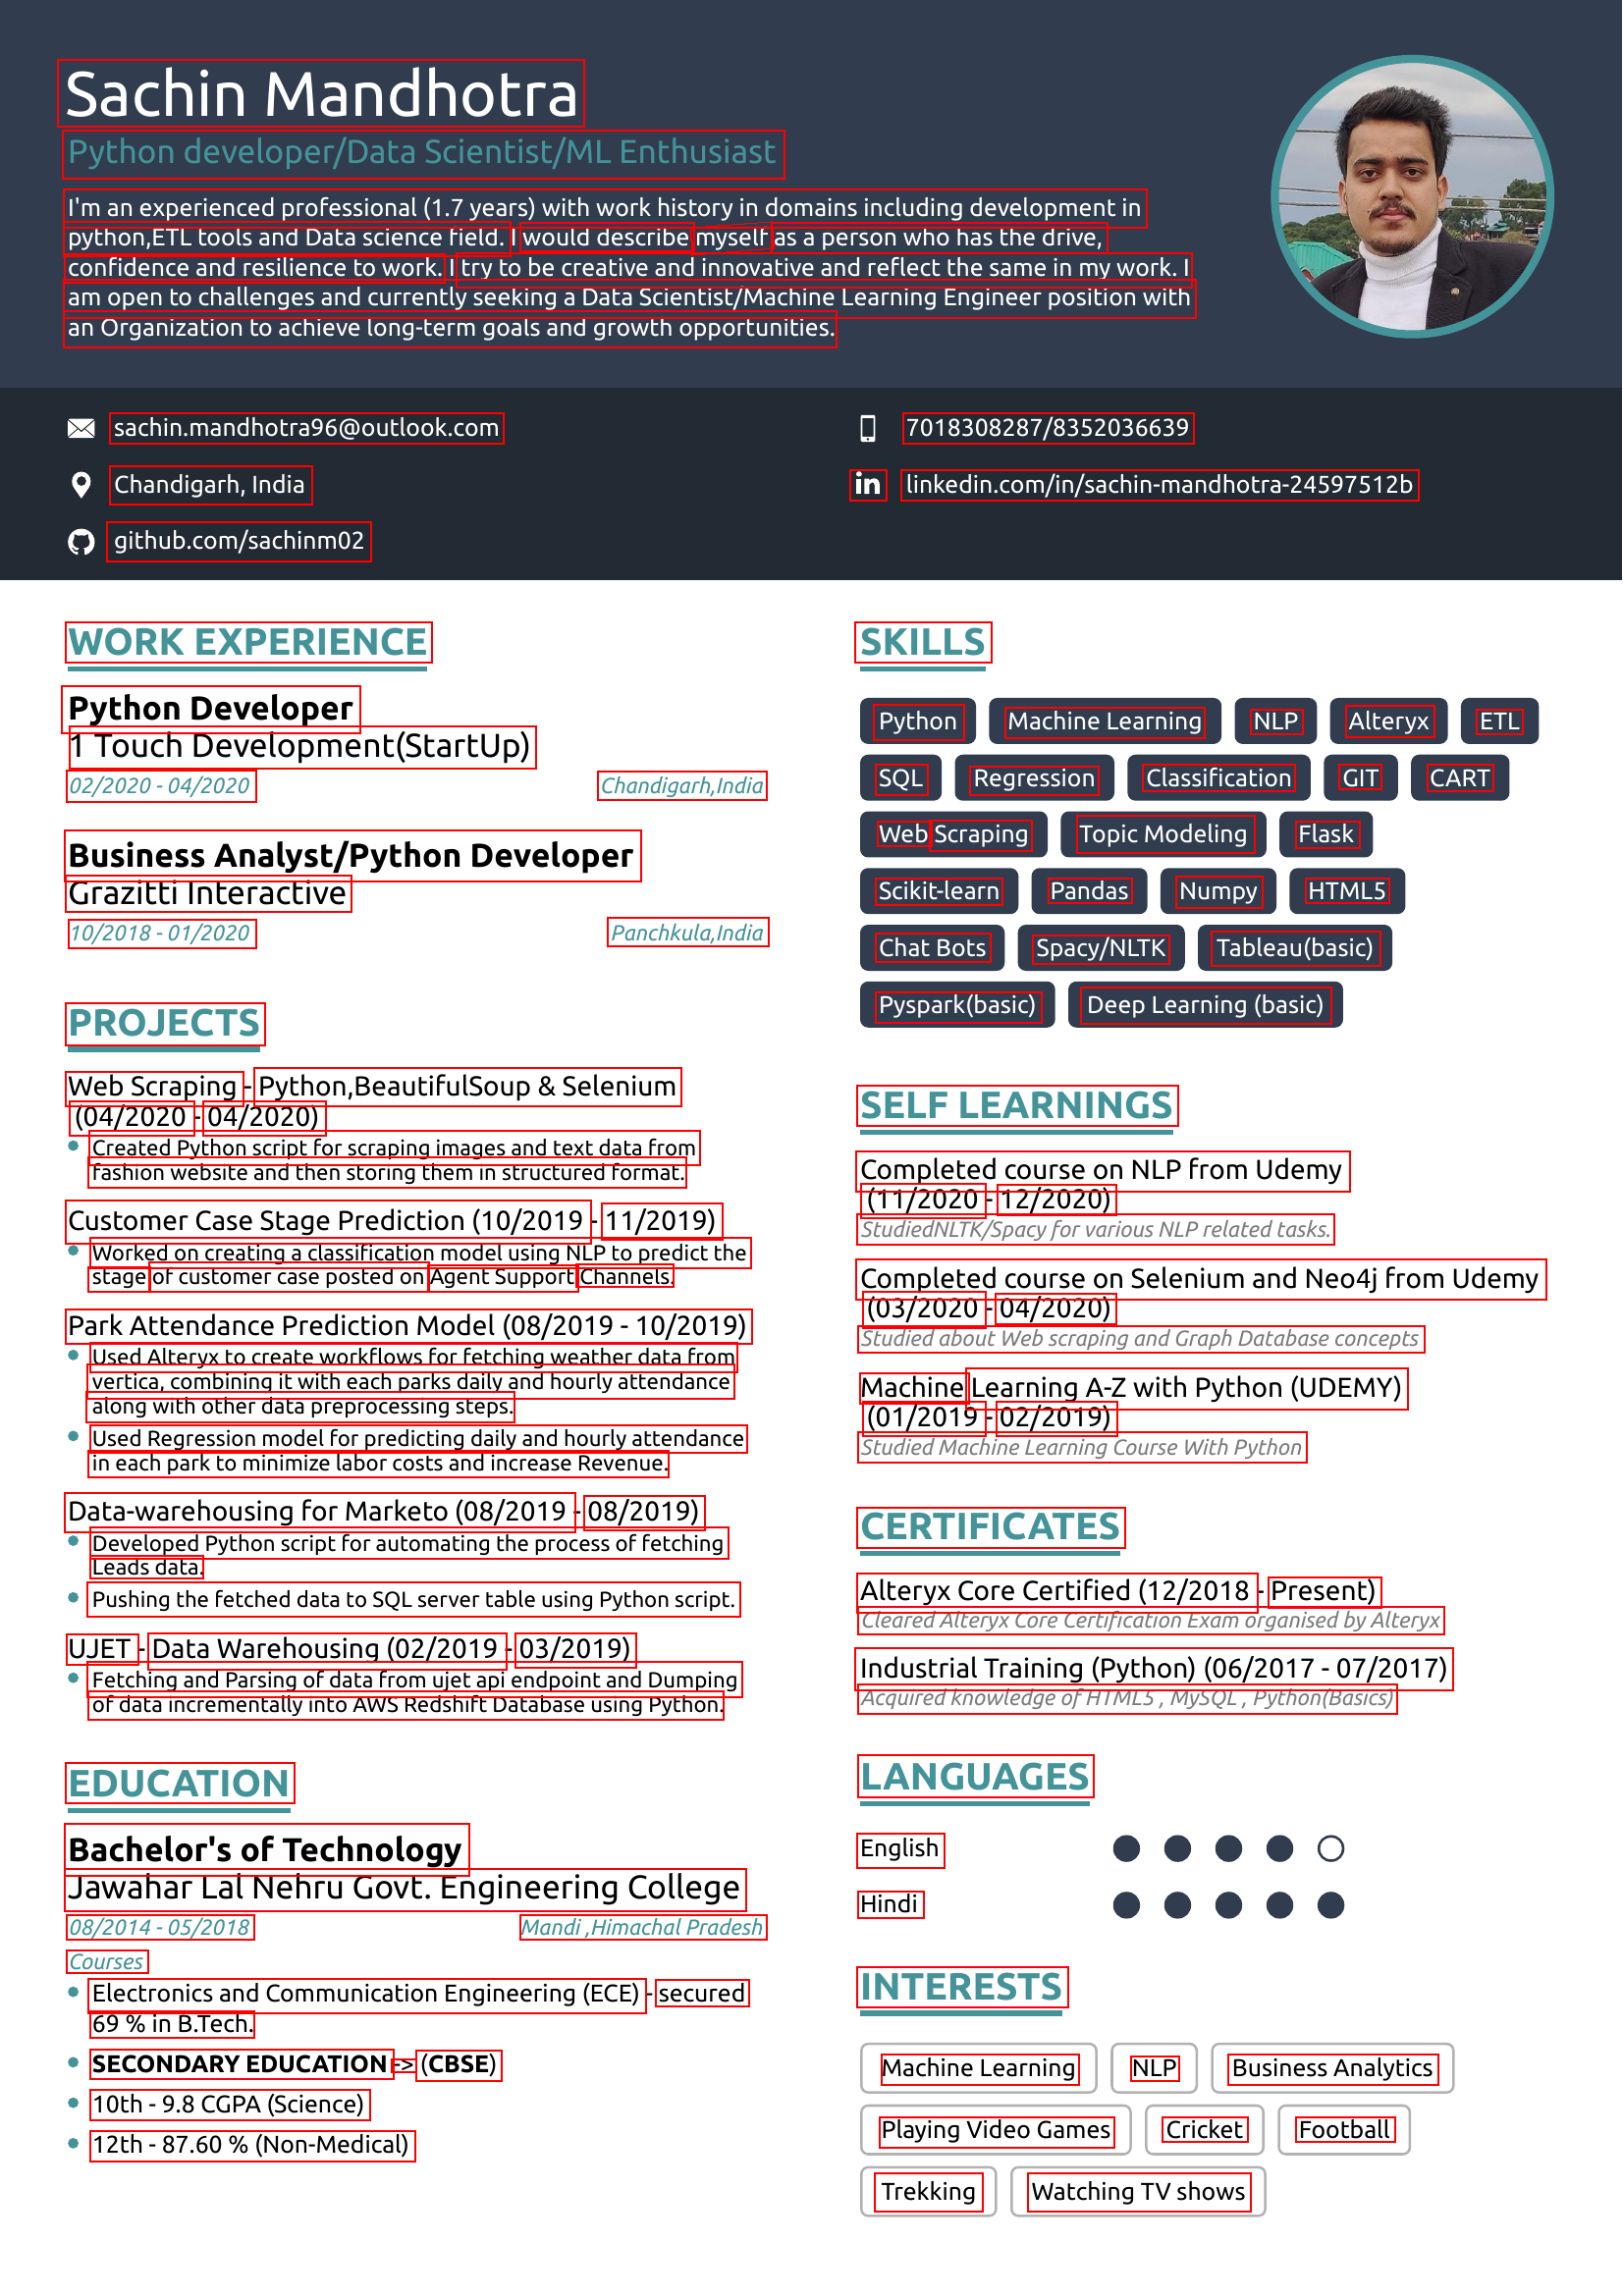

In [28]:
def draw_boxes(image,bounds,color='red',width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width = width)
  return image

draw_boxes(images[0],bounds)


In [24]:
""" Checking the data """
bounds[1][1]

'Python developer/Data Scientist/ML Enthusiast'

### Combining the texts in multiple list elements into a single text

In [25]:
text = ''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'

print(text)

Sachin Mandhotra
Python developer/Data Scientist/ML Enthusiast
I'm an experienced professional (1.7 years) with work history in domains including development in
python,ETL tools and Data science field.
would describe
as a person who has the drive,
myselF
tryto be creative and innovative and reflect the same in mywork.|
confidence and resilience to work.
am open to challenges and currently seeking a Data Scientist/Machine Learning Engineer position with
an Organization to achieve long-term goals and growth opportunities.
sachin.mandhotra96@outlook.com
7018308287/8352036639
Chandigarh, India
in
linkedin.com/in/sachin-mandhotra-24597512b
github.com/sachinm02
WORK EXPERIENCE
SKILLS
Python Developer
Python
Alteryx
Machine Learning
NLP
ETL
1Touch Development StartUp)
SQL
Classification
GIT
CART
Regression
02/2020 - 04/2020
Chandigarh,India
Topic Modeling
Scraping
Web
Flask
Business Analyst/Python Developer
Grazitti Interactive
Numpy
Scikit learn
Pandas
HTML5
Panchkula,India
10/2018 - 01/2020

In [26]:
""" Loading the small sized english model from Spacy for NER. """
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

## Using Spacy to display the recognised Entities and their labels.

In [27]:
from spacy import displacy
displacy.render(nlp(doc.text),style = 'ent',jupyter=True)

## And we are done...
### Although the results are not that accurate but we have done a decent job!!!